# Dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

In [4]:
data = pd.read_csv("Datasets/dermatology_database_1.csv")
data = data.replace('?', np.nan)
data = data.dropna()

In [5]:
# data.corr()['class'].sort_values(ascending=True)

Explained variance ratio: [0.27359219 0.16169949]


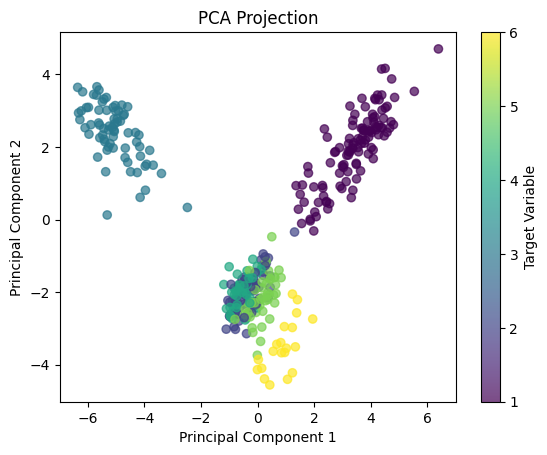

In [6]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

df = data

# Step 2: Separate features (X) and target (y)
X = df.iloc[:, :-1].values  # Select all columns except the last one (features)
y = df.iloc[:, -1].values  # Select the last column (target variable)

# Step 3: Standardize the features (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Apply PCA to reduce dimensions to 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Step 5: Create a new DataFrame with PCA features
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['Target'] = y  # Add target variable back

# Step 6: Print explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)

# Step 7 (Optional): Visualize the results
import matplotlib.pyplot as plt

plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['Target'], cmap='viridis', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projection')
plt.colorbar(label="Target Variable")
plt.show()

Explained variance ratio: [0.27359219 0.16169949]


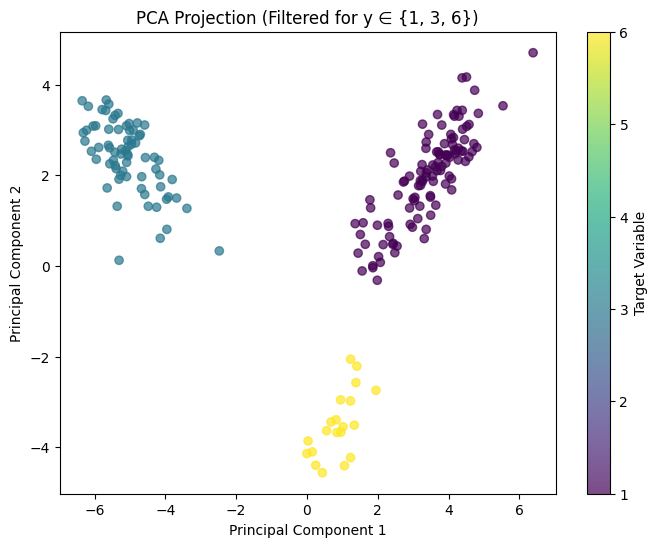

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assume df is already defined
df = data

# Step 2: Separate features (X) and target (y)
X = df.iloc[:, :-1].values  # Select all columns except the last one (features)
y = df.iloc[:, -1].values   # Select the last column (target variable)

# Step 3: Standardize the features (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Apply PCA to reduce dimensions to 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Step 5: Create a new DataFrame with PCA features
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['Target'] = y  # Add target variable back

# Step 6: Print explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)

# Step 7: Filter data where target variable y is in [1, 3, 6]
df_filtered = df_pca[df_pca['Target'].isin([1, 3, 6])]

# Step 8: Visualize the filtered results
plt.figure(figsize=(8, 6))
scatter = plt.scatter(df_filtered['PC1'], df_filtered['PC2'], 
                      c=df_filtered['Target'], cmap='viridis', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projection (Filtered for y ∈ {1, 3, 6})')

# Add color bar legend
cbar = plt.colorbar(scatter)
cbar.set_label("Target Variable")

plt.show()

In [96]:
df_filtered['Target'].value_counts()

Target
1    111
3     71
6     20
Name: count, dtype: int64

# train test val split

In [21]:
X = df_filtered[['PC1', 'PC2']].values
X = np.c_[np.ones(X.shape[0]), X]
y = df_filtered[['Target']].values.squeeze()
mapping = {1: 0, 3: 1, 6: 2}
y_transformed = np.vectorize(mapping.get)(y)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y_transformed, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((161, 3), (20, 3), (21, 3), (161,), (20,), (21,))

# Softmax regression

In [25]:
def one_hot_encoding(y, c):
    matrix = np.zeros((len(y), c))
    index = np.arange(len(y))
    matrix[index, y] = 1
    return matrix

y_train_one_hot = one_hot_encoding(y_train, 3)  
y_train_one_hot.shape

(161, 3)

In [29]:
def calculate_z(X_train, W):
    # X=(m, n) ; W=(n, c)  
    z = np.dot(X_train, W) # z = (m, c)
    return z

W = np.random.rand(3,3)
z = calculate_z(X_train, W)
z.shape


(161, 3)

In [39]:
def calculate_softmax(z):
    y_hat = np.exp(z) / np.sum(np.exp(z), axis = 1, keepdims=True)
    return y_hat

y_prob = calculate_softmax(z)
y_hat = np.argmax(y_prob, axis=1)
y_prob.shape, y_hat.shape

((161, 3), (161,))

In [33]:
def calculate_loss_function(y_one_hot, y_hat):
    loss = -np.sum(y_one_hot * np.log(y_hat)) / y_one_hot.shape[0]
    return loss 

loss = calculate_loss_function(y_train_one_hot, y_prob)
loss

0.5083574828382618

In [34]:
def calculate_gradient(y_one_hot, y_hat, X_train):
    m = X.shape[0]
    grad = np.dot(X_train.T, (y_hat - y_one_hot)) / m
    return grad

grad = calculate_gradient(y_train_one_hot, y_prob, X_train)
grad.shape

(3, 3)

In [35]:
def update_weights(W, grad, lr):
    W = W - lr * grad
    return W

W = update_weights(W, grad, 0.01)
W.shape

(3, 3)

In [45]:
epochs = 300
lr = 0.1
batch_size = 10
c = 3
W = np.random.rand(3,3)

## Train

Epoch 1/300, loss: 1.326921597871016, f1: 0.04444444444444445, accuracy: 0.05
Best f1: 0.04444444444444445
Epoch 2/300, loss: 0.7985615511371913, f1: 0.4166666666666667, accuracy: 0.4
Best f1: 0.4166666666666667
Epoch 3/300, loss: 0.5442470596653813, f1: 0.6506238859180036, accuracy: 0.65
Best f1: 0.6506238859180036
Epoch 4/300, loss: 0.4031722036032237, f1: 1.0, accuracy: 1.0
Best f1: 1.0
Epoch 5/300, loss: 0.31558473396603337, f1: 1.0, accuracy: 1.0
Epoch 6/300, loss: 0.25690619434975, f1: 1.0, accuracy: 1.0
Epoch 7/300, loss: 0.21532620198426453, f1: 1.0, accuracy: 1.0
Epoch 8/300, loss: 0.1845541776453844, f1: 1.0, accuracy: 1.0
Epoch 9/300, loss: 0.1609820518299786, f1: 1.0, accuracy: 1.0
Epoch 10/300, loss: 0.14241513218027152, f1: 1.0, accuracy: 1.0
Epoch 11/300, loss: 0.12745224061751576, f1: 1.0, accuracy: 1.0
Epoch 12/300, loss: 0.11516180264666248, f1: 1.0, accuracy: 1.0
Epoch 13/300, loss: 0.10490283357050019, f1: 1.0, accuracy: 1.0
Epoch 14/300, loss: 0.09622116297567794, 

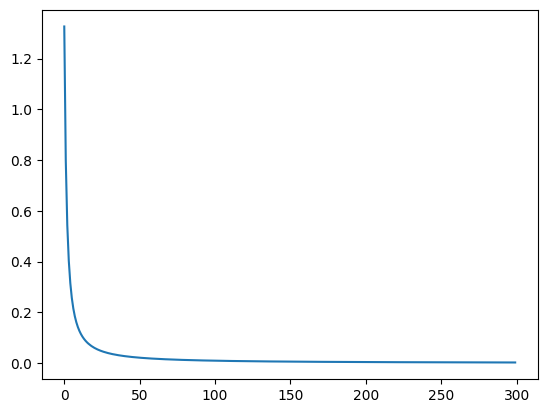

In [46]:
def train(X_train, y_train, X_val, y_val, W, epochs, lr, batch_size):
    lossess = []
    best_f1 = 0
    best_w = W
    for epoch in range(epochs):
        for i in range(0, len(y_train), batch_size):
            X_batch = X_train[i:i+batch_size]
            y_batch = y_train[i:i+batch_size]
            y_batch_one_hot = one_hot_encoding(y_batch, c)

            z = calculate_z(X_batch, W)
            y_prob_train = calculate_softmax(z)
            loss = calculate_loss_function(y_batch_one_hot, y_prob_train)
            grad = calculate_gradient(y_batch_one_hot, y_prob_train, X_batch)
            W = update_weights(W, grad, lr)
        
        lossess.append(loss)

        # Validation loop
        z_val = calculate_z(X_val, W)
        y_prob_val = calculate_softmax(z_val)
        y_hat = np.argmax(y_prob_val, axis=1)
        
        f1 = f1_score(y_val, y_hat, average= 'macro')
        accuracy = accuracy_score(y_val, y_hat)

        print(f'Epoch {epoch + 1}/{epochs}, loss: {loss}, f1: {f1}, accuracy: {accuracy}')
        
        if f1 > best_f1:
            best_f1 = f1
            best_w = W
            print(f"Best f1: {best_f1}")

    return best_w, lossess


best_w, lossess = train(X_train, y_train, X_val, y_val, W, epochs, lr, batch_size)
best_w
plt.plot(lossess)


# Evaluate

In [51]:
z_test = calculate_z(X_test, best_w)
y_prob_test = calculate_softmax(z_test)
y_hat = np.argmax(y_prob_test, axis=1)

f1_macro = f1_score(y_test, y_hat, average= 'macro')
f1_micro = f1_score(y_test, y_hat, average= 'micro')
f1_weighted = f1_score(y_test, y_hat, average= 'weighted')

f1_macro, f1_micro, f1_weighted

(1.0, 1.0, 1.0)

# Plot

In [106]:
z_values = calculate_z(X_train, best_w)
z_values = z_values / np.sum(z_values, axis = 1, keepdims=True)
w = best_w
z_values.shape

(161, 3)

In [107]:
# Extract x1 (GRE Score) and x2 (CGPA)
x1 = X_train[:, 1]  
x2 = X_train[:, 2]  
y_true = y_train  # True labels (0 or 1)

In [108]:
# Set colors based on y values
colors = {0:'red', 1:'green', 2:'blue'}
colors = np.vectorize(colors.get)(y_true)
colors

array(['green', 'red', 'red', 'red', 'red', 'red', 'red', 'blue', 'red',
       'green', 'red', 'red', 'red', 'green', 'green', 'green', 'blue',
       'red', 'red', 'green', 'red', 'green', 'red', 'green', 'red',
       'red', 'blue', 'red', 'green', 'red', 'red', 'red', 'green',
       'green', 'green', 'red', 'green', 'green', 'red', 'red', 'green',
       'blue', 'blue', 'red', 'green', 'green', 'red', 'red', 'blue',
       'green', 'red', 'green', 'red', 'green', 'red', 'red', 'red',
       'green', 'red', 'green', 'red', 'blue', 'red', 'red', 'red',
       'blue', 'green', 'red', 'red', 'red', 'red', 'red', 'green', 'red',
       'red', 'red', 'green', 'blue', 'blue', 'red', 'red', 'red', 'red',
       'green', 'red', 'green', 'green', 'red', 'red', 'red', 'green',
       'red', 'red', 'green', 'red', 'green', 'green', 'green', 'green',
       'red', 'red', 'red', 'blue', 'red', 'blue', 'blue', 'green', 'red',
       'red', 'green', 'red', 'red', 'green', 'red', 'blue', 'red', 'r

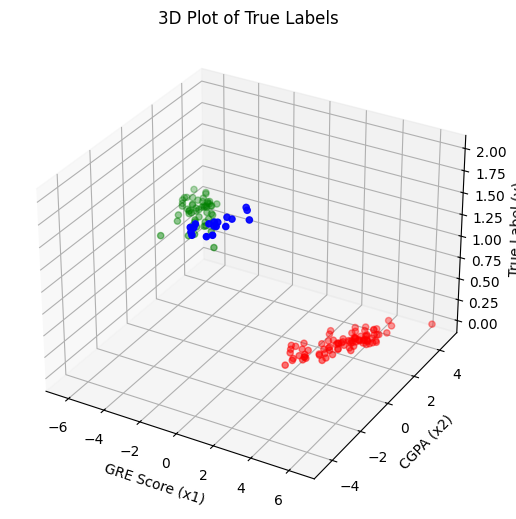

In [109]:
# Create a figure with two 3D subplots
fig = plt.figure(figsize=(10, 6))

### 🔹 Subplot 1: True Labels in 3D ###
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(x1, x2, y_true, c=colors, marker='o')

# Labels & Title
ax1.set_xlabel("GRE Score (x1)")
ax1.set_ylabel("CGPA (x2)")
ax1.set_zlabel("True Label (y)")
ax1.set_title("3D Plot of True Labels")

# Show plot
plt.tight_layout()
plt.show()

In [110]:
z_values


array([[ 4.72745310e-01,  1.47607957e-01,  3.79646733e-01],
       [ 4.14761976e-01,  1.92362661e-01,  3.92875363e-01],
       [ 4.30038758e-01,  1.88702746e-01,  3.81258497e-01],
       [ 4.28739383e-01,  2.01730125e-01,  3.69530492e-01],
       [ 4.32097515e-01,  2.00766202e-01,  3.67136282e-01],
       [ 4.29408519e-01,  1.86639712e-01,  3.83951769e-01],
       [ 4.16635003e-01,  1.74176677e-01,  4.09188320e-01],
       [ 7.80837513e+00,  1.33037953e+01, -2.01121704e+01],
       [ 4.35364195e-01,  2.01115956e-01,  3.63519849e-01],
       [ 4.75929856e-01,  1.47946087e-01,  3.76124057e-01],
       [ 4.36176710e-01,  2.07609073e-01,  3.56214217e-01],
       [ 4.34336522e-01,  2.00460598e-01,  3.65202880e-01],
       [ 4.35433815e-01,  1.99798556e-01,  3.64767629e-01],
       [ 4.76535670e-01,  1.32126985e-01,  3.91337346e-01],
       [ 4.80892048e-01,  1.38476977e-01,  3.80630975e-01],
       [ 4.98925783e-01,  1.51286349e-01,  3.49787868e-01],
       [ 3.24554062e-01, -7.48378719e-02

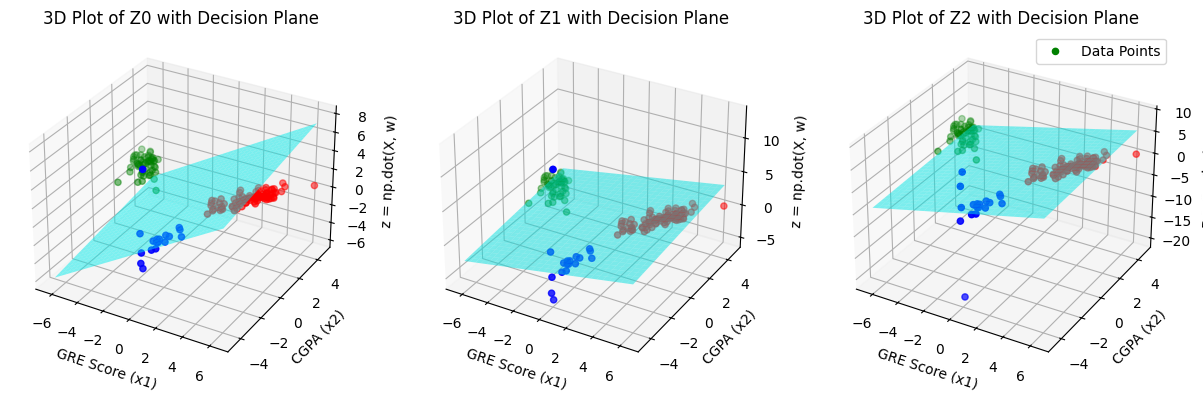

In [111]:
# Create a figure with two 3D subplots

fig = plt.figure(figsize=(15, 6))

for i in range(z_values.shape[1]):
    axi = fig.add_subplot(131+i, projection='3d')
    axi.scatter(x1, x2, z_values[:,i], c=colors, marker='o', label="Data Points")

    # Create a meshgrid for the decision plane
    x1_range = np.linspace(min(x1), max(x1), 30)
    x2_range = np.linspace(min(x2), max(x2), 30)
    X1_mesh, X2_mesh = np.meshgrid(x1_range, x2_range)

    # Compute z-plane (decision boundary)
    Z_plane = w[0, i] + w[1, i] * X1_mesh + w[2, i] * X2_mesh
    axi.plot_surface(X1_mesh, X2_mesh, Z_plane, color='cyan', alpha=0.5)

    # Labels & Title
    axi.set_xlabel("GRE Score (x1)")
    axi.set_ylabel("CGPA (x2)")
    axi.set_zlabel("z = np.dot(X, w)")
    axi.set_title(f"3D Plot of Z{i} with Decision Plane")

# Show plot
plt.legend()
plt.show()

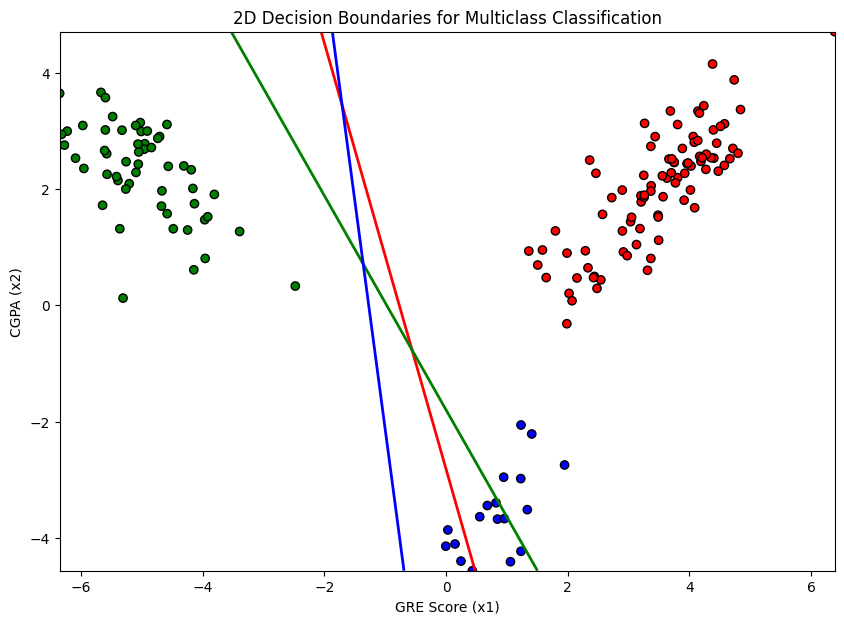

In [91]:
# Create a 2D meshgrid for plotting
x1_range = np.linspace(min(x1), max(x1), 200)
x2_range = np.linspace(min(x2), max(x2), 200)
X1_mesh, X2_mesh = np.meshgrid(x1_range, x2_range)

# Plot the data points
plt.figure(figsize=(10, 7))
plt.scatter(x1, x2, c=colors, edgecolors='black', marker='o', label="Data Points")

# Plot decision boundaries for each class
for i, color in zip(range(3), ['red', 'green', 'blue']):
    # Compute decision boundary where z = 0
    Z_boundary = w[0, i] + w[1, i] * X1_mesh + w[2, i] * X2_mesh
    plt.contour(X1_mesh, X2_mesh, Z_boundary, levels=[0], colors=color, linewidths=2)

# Labels & Title
plt.xlabel("GRE Score (x1)")
plt.ylabel("CGPA (x2)")
plt.title("2D Decision Boundaries for Multiclass Classification")

# Show plot
plt.show()

In [ ]:
X_label1 = X_train[y_train==1]
X_label1.shape

(54, 3)

In [105]:
z_values = calculate_z(X_label1, best_w)
w = best_w
z_norm = z_values / np.sum(z_values, axis = 1, keepdims=True)
z_norm

array([[0.47274531, 0.14760796, 0.37964673],
       [0.47592986, 0.14794609, 0.37612406],
       [0.47653567, 0.13212698, 0.39133735],
       [0.48089205, 0.13847698, 0.38063098],
       [0.49892578, 0.15128635, 0.34978787],
       [0.47303379, 0.15273723, 0.37422897],
       [0.49329405, 0.14065243, 0.36605352],
       [0.48470885, 0.17131224, 0.3439789 ],
       [0.47658787, 0.15339287, 0.37001926],
       [0.48067547, 0.14030521, 0.37901932],
       [0.48072358, 0.13526953, 0.38400689],
       [0.48179275, 0.13829762, 0.37990963],
       [0.48766612, 0.14913055, 0.36320332],
       [0.4835562 , 0.13243627, 0.38400753],
       [0.48264618, 0.16058069, 0.35677313],
       [0.48151405, 0.1551549 , 0.36333105],
       [0.47462939, 0.16080811, 0.3645625 ],
       [0.48923098, 0.15327104, 0.35749798],
       [0.48086229, 0.13251172, 0.38662599],
       [0.47734635, 0.1367572 , 0.38589645],
       [0.48743122, 0.16696859, 0.34560019],
       [0.48167177, 0.13366976, 0.38465847],
       [0.

In [101]:
z[:,1]

array([-2.07447971,  1.48038454,  2.4390568 ,  2.27712165,  2.63644793,
        2.37954047,  1.56522269,  0.02216268,  3.11605164, -1.80669443,
        3.22618216,  2.94927797,  3.1356157 , -1.68972438, -1.46319776,
       -0.90960339,  0.45771704,  2.85605751,  1.66485025, -2.07816443,
        1.92127402, -1.02032762,  2.42865123, -1.39353039,  2.51011489,
        2.87191465, -0.03860273,  3.23222589, -1.78500109,  2.74016805,
        2.61979418,  2.99386106, -1.48083514, -1.46020572, -1.41843864,
        1.67007518, -1.21071384, -1.32063748,  3.210587  ,  3.2955456 ,
       -1.45411043,  0.76623589,  0.04417993,  3.11875584, -1.4916678 ,
       -1.9792263 ,  1.44364038,  3.02114046,  0.62799596, -1.16824424,
        3.17986113, -1.44348819,  1.91498561, -1.65745408,  3.1113539 ,
        2.36947506,  2.61487201, -1.26832721,  2.1553612 , -1.40841242,
        3.58450886,  0.41593993,  3.23270196,  3.29992041,  3.1194232 ,
        1.16730939, -2.03620812,  3.23409585,  3.41323181,  2.38